### packages

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import copy
from scipy.signal import find_peaks



## data exploration

In [2]:
data_info = pd.read_csv("./metadata.csv")
data_info = data_info.fillna(0)
# data_info

In [3]:
# for sample S0000 - first sample
data_info_train = data_info.loc[data_info.split=='train']
data_info_test = data_info.loc[data_info.split=='val']


In [4]:
data_label = pd.read_csv('./train_labels.csv')

This is the label count of label dataset

In [5]:
print("output".ljust(50) , " 0".ljust(5), "1".ljust(10))
print()
for cols in data_label.columns[1:]:
    print(str(cols).ljust(50) , np.array(data_label[cols].value_counts()))


output                                              0    1         

aromatic                                           [730  79]
hydrocarbon                                        [544 265]
carboxylic_acid                                    [694 115]
nitrogen_bearing_compound                          [713  96]
chlorine_bearing_compound                          [791  18]
sulfur_bearing_compound                            [778  31]
alcohol                                            [783  26]
other_oxygen_bearing_compound                      [788  21]
mineral                                            [692 117]


In [ ]:
label_names = ['sample_id', 'aromatic', 'hydrocarbon', 'carboxylic_acid',
       'nitrogen_bearing_compound', 'chlorine_bearing_compound',
       'sulfur_bearing_compound', 'alcohol', 'other_oxygen_bearing_compound',
       'mineral']

In [62]:
def plot_peaks(df):
    x = df.mass.values
    y = df.intensity.values
    #Find peaks
    peaks = find_peaks(y, height = 1e6, threshold = 1, distance = 1)
    height = peaks[1]['peak_heights'] #list of the heights of the peaks
    peak_pos = x[peaks[0]] #list of the peaks positions
    #Finding the minima
    y2 = y*-1
    minima = find_peaks(y2)
    min_pos = x[minima[0]] #list of the minima positions
    min_height = y2[minima[0]] #list of the mirrored minima heights
    #Plotting
    print(len(peaks[0] ), len(df))
    fig = plt.figure()
    ax = fig.subplots()
    ax.plot(x,y)
    ax.scatter(peak_pos, height, color = 'r', s = 15, marker = 'D', label = 'Maxima')
    ax.scatter(min_pos, min_height*-1, color = 'gold', s = 15, marker = 'X', label = 'Minima')
    ax.legend()
    ax.grid()
    plt.show()

In [63]:
# see one sample
path = "train_features/S0002.csv"
df = pd.read_csv(path)

In [64]:
df_mass_grouped = df.sort_values('mass')
df_mass_grouped['mass'] = df_mass_grouped['mass'].astype(int)
df_mass_grouped = df_mass_grouped.groupby('mass').mean()
df_mass_grouped = df_mass_grouped.reset_index()
df_mass_grouped_int = df_mass_grouped.sort_values(by = 'intensity',ascending=False)
df_mass_grouped_int



,mass,time,intensity
174,207,24.410630,4.873696e+07
10,43,21.408220,4.365043e+07
11,44,25.325723,2.385284e+07
6,39,21.695585,1.992874e+07
24,57,22.089827,1.168163e+07
...,...,...,...
478,511,22.010174,8.959544e+02
477,510,21.870681,8.876229e+02
495,528,21.937428,8.775625e+02
493,526,21.605269,8.110074e+02


18 502


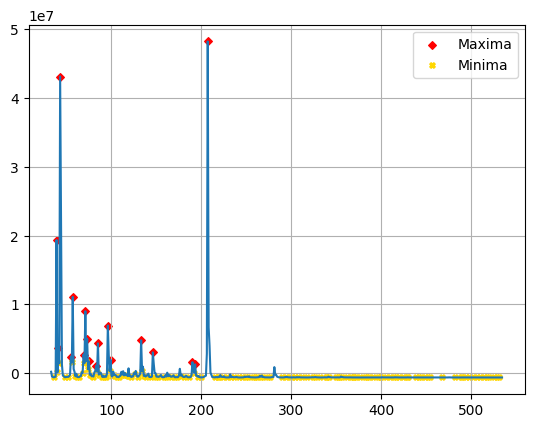

In [65]:
# sns.lineplot(data = df_mass_grouped, x = df_mass_grouped.index ,y = 'intensity' )
df_mass_grouped['intensity'] -= df_mass_grouped['intensity'].mean()

plot_peaks(df_mass_grouped)
# df_mass_grouped

In [66]:
norm = df_mass_grouped_int.intensity.max()-df_mass_grouped_int.intensity.min()
norm_min = df_mass_grouped_int.intensity.min()
df_mass_grouped_int["intensity_scaled"] = (df_mass_grouped_int["intensity"] - norm_min)/norm
df_mass_grouped_int

,mass,time,intensity,intensity_scaled
174,207,24.410630,4.873696e+07,1.000000e+00
10,43,21.408220,4.365043e+07,8.956312e-01
11,44,25.325723,2.385284e+07,4.894115e-01
6,39,21.695585,1.992874e+07,4.088944e-01
24,57,22.089827,1.168163e+07,2.396748e-01
...,...,...,...,...
478,511,22.010174,8.959544e+02,1.883273e-06
477,510,21.870681,8.876229e+02,1.712320e-06
495,528,21.937428,8.775625e+02,1.505894e-06
493,526,21.605269,8.110074e+02,1.402739e-07


0 502


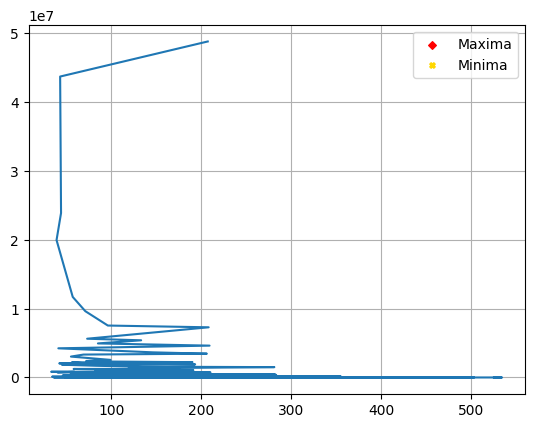

In [67]:
# sns.lineplot(data = df_mass_grouped, x = df_mass_grouped.index ,y = 'intensity' )
plot_peaks(df_mass_grouped_int)
# df_mass_grouped

In [ ]:
datapea

In [ ]:
df_mass = df.sort_values(by = "mass")
sns.lineplot(data = df_mass, x = "mass", y = "intensity")